In [42]:
## Imports

import pandas as pd
import numpy as np 
from pathlib import Path
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from statsbombpy import sb
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
pd.options.display.max_columns = 200


Exploring the dataset

In [3]:
comps = sb.competitions()
comps.sort_values(['competition_name','season_name']).tail(30)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
48,11,22,Spain,La Liga,male,False,False,2010/2011,2025-06-24T13:51:54.910296,2021-06-13T16:17:31.694,None,2025-06-24T13:51:54.910296
47,11,23,Spain,La Liga,male,False,False,2011/2012,2025-06-24T13:38:10.764259,2021-06-13T16:17:31.694,None,2025-06-24T13:38:10.764259
46,11,24,Spain,La Liga,male,False,False,2012/2013,2025-06-24T13:53:14.047130,2021-06-13T16:17:31.694,None,2025-06-24T13:53:14.047130
45,11,25,Spain,La Liga,male,False,False,2013/2014,2025-06-24T09:52:44.048585,2021-06-13T16:17:31.694,None,2025-06-24T09:52:44.048585
44,11,26,Spain,La Liga,male,False,False,2014/2015,2025-06-24T13:39:01.068680,2021-06-13T16:17:31.694,None,2025-06-24T13:39:01.068680
43,11,27,Spain,La Liga,male,False,False,2015/2016,2025-04-23T13:59:22.835792,2021-06-13T16:17:31.694,None,2025-04-23T13:59:22.835792
42,11,2,Spain,La Liga,male,False,False,2016/2017,2025-03-09T16:03:54.962718,2021-06-13T16:17:31.694,None,2025-03-09T16:03:54.962718
41,11,1,Spain,La Liga,male,False,False,2017/2018,2025-07-14T10:01:16.674864,2021-06-13T16:17:31.694,None,2025-07-14T10:01:16.674864
40,11,4,Spain,La Liga,male,False,False,2018/2019,2024-09-22T18:50:23.364757,2021-07-09T14:53:22.103024,None,2024-09-22T18:50:23.364757
39,11,42,Spain,La Liga,male,False,False,2019/2020,2024-12-16T16:51:06.833054,2021-06-13T16:17:31.694,None,2024-12-16T16:51:06.833054


In [4]:
## Getting Euro2025 from dataset 

comp_id = 53
season_id = 315 

matches = sb.matches(competition_id = comp_id, season_id = season_id)
match_id = int(matches.iloc[10].match_id)
events = sb.events(match_id=match_id)
print("Loaded Match:", match_id, "| Rows:", len(events))

Loaded Match: 3998856 | Rows: 3082


In [5]:
print("Total columns:", len(events.columns))
list(events.columns)


Total columns: 88


['50_50',
 'ball_receipt_outcome',
 'ball_recovery_recovery_failure',
 'block_deflection',
 'block_save_block',
 'carry_end_location',
 'clearance_aerial_won',
 'clearance_body_part',
 'clearance_head',
 'clearance_left_foot',
 'clearance_right_foot',
 'counterpress',
 'dribble_nutmeg',
 'dribble_outcome',
 'dribble_overrun',
 'duel_outcome',
 'duel_type',
 'duration',
 'foul_committed_advantage',
 'foul_committed_card',
 'foul_committed_penalty',
 'foul_committed_type',
 'foul_won_advantage',
 'foul_won_defensive',
 'goalkeeper_body_part',
 'goalkeeper_end_location',
 'goalkeeper_outcome',
 'goalkeeper_position',
 'goalkeeper_technique',
 'goalkeeper_type',
 'id',
 'index',
 'injury_stoppage_in_chain',
 'interception_outcome',
 'location',
 'match_id',
 'minute',
 'off_camera',
 'out',
 'pass_aerial_won',
 'pass_angle',
 'pass_assisted_shot_id',
 'pass_body_part',
 'pass_cross',
 'pass_end_location',
 'pass_goal_assist',
 'pass_height',
 'pass_inswinging',
 'pass_length',
 'pass_outco

In [12]:
null_percent = (events.isnull().mean() * 100).round(2)
null_percent[null_percent > 0].sort_values(ascending=False).head(20)

pass_straight               99.97
block_deflection            99.97
block_save_block            99.97
injury_stoppage_in_chain    99.97
clearance_aerial_won        99.97
foul_committed_penalty      99.97
dribble_nutmeg              99.97
dribble_overrun             99.97
foul_committed_advantage    99.94
foul_won_defensive          99.94
foul_won_advantage          99.94
foul_committed_type         99.94
pass_goal_assist            99.90
shot_aerial_won             99.90
foul_committed_card         99.90
50_50                       99.87
pass_through_ball           99.81
tactics                     99.81
clearance_left_foot         99.77
goalkeeper_body_part        99.77
dtype: float64

In [13]:
mostly_null = null_percent[null_percent >= 90]
print("Columns with ≥90% null values:")
print(mostly_null)


Columns with ≥90% null values:
50_50                             99.87
ball_receipt_outcome              98.90
ball_recovery_recovery_failure    99.77
block_deflection                  99.97
block_save_block                  99.97
clearance_aerial_won              99.97
clearance_body_part               99.19
clearance_head                    99.68
clearance_left_foot               99.77
clearance_right_foot              99.74
counterpress                      95.72
dribble_nutmeg                    99.97
dribble_outcome                   98.73
dribble_overrun                   99.97
duel_outcome                      98.35
duel_type                         97.89
foul_committed_advantage          99.94
foul_committed_card               99.90
foul_committed_penalty            99.97
foul_committed_type               99.94
foul_won_advantage                99.94
foul_won_defensive                99.94
goalkeeper_body_part              99.77
goalkeeper_end_location           99.55
goalkeepe

In [14]:
events_clean = events.drop(columns=mostly_null.index)
print("Remaining columns:", len(events_clean.columns))

Remaining columns: 29


In [17]:
print(events_clean.columns)

Index(['carry_end_location', 'duration', 'id', 'index', 'location', 'match_id',
       'minute', 'pass_angle', 'pass_body_part', 'pass_end_location',
       'pass_height', 'pass_length', 'pass_recipient', 'pass_recipient_id',
       'period', 'play_pattern', 'player', 'player_id', 'position',
       'possession', 'possession_team', 'possession_team_id', 'related_events',
       'second', 'team', 'team_id', 'timestamp', 'type', 'under_pressure'],
      dtype='object')


In [18]:
def get_cords(loc):
    if isinstance(loc, list) and len(loc) >=2:
        return loc[0], loc[1]
    return None, None


In [20]:
events_clean['x'], events_clean['y'] = zip (*events_clean['location'].apply(get_cords))
print(events_clean[['type', 'team', 'x', 'y']].head(10))

          type             team     x     y
0  Starting XI   Sweden Women's   NaN   NaN
1  Starting XI  Germany Women's   NaN   NaN
2   Half Start  Germany Women's   NaN   NaN
3   Half Start   Sweden Women's   NaN   NaN
4   Half Start  Germany Women's   NaN   NaN
5   Half Start   Sweden Women's   NaN   NaN
6         Pass  Germany Women's  61.0  40.1
7         Pass  Germany Women's  43.6  44.3
8         Pass  Germany Women's  35.4  49.9
9         Pass  Germany Women's  73.8  14.9


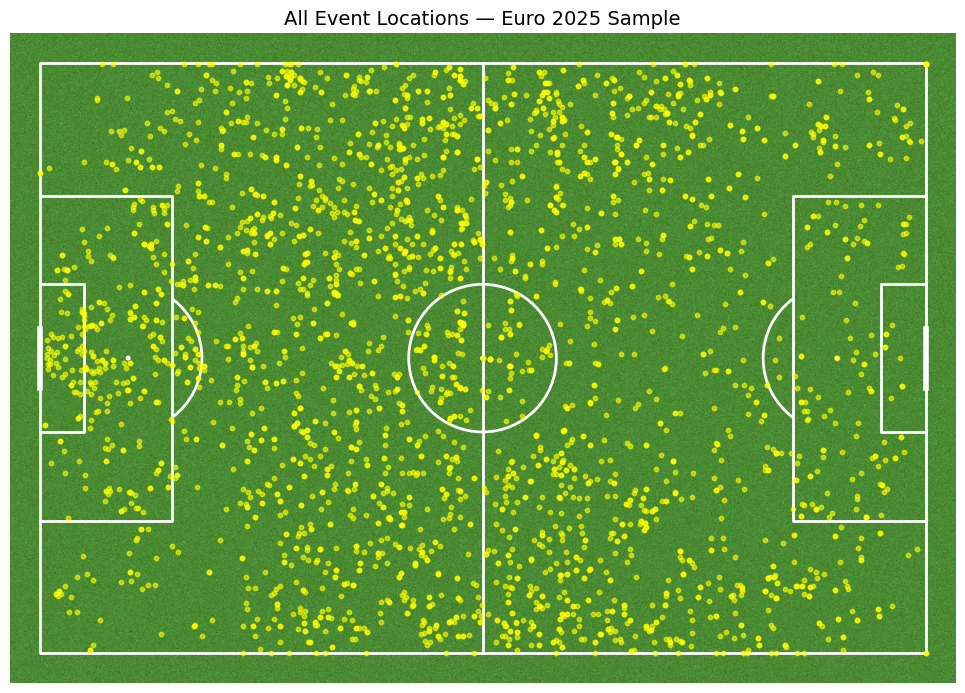

In [21]:
## Sample Field Viz

pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))

# only plot rows with valid coordinates
valid = events_clean.dropna(subset=['x', 'y'])
ax.scatter(valid['x'], valid['y'], s=10, alpha=0.6, c='yellow')

ax.set_title("All Event Locations — Euro 2025 Sample", fontsize=14)
plt.show()

In [22]:
## Clean 'Type' in events_clean to get only events that have cords (get rid of starting, half time, subs) 

events_clean['type'].value_counts()

type
Pass                 835
Ball Receipt*        683
Carry                665
Pressure             399
Ball Recovery        108
Duel                  65
Dribble               39
Dispossessed          32
Goal Keeper           32
Block                 29
Miscontrol            25
Clearance             25
Foul Committed        24
Shot                  22
Foul Won              22
Interception          21
Dribbled Past         20
Substitution          10
Half Start             4
50/50                  4
Injury Stoppage        4
Tactical Shift         4
Half End               4
Referee Ball-Drop      2
Starting XI            2
Error                  1
Shield                 1
Name: count, dtype: int64

In [23]:
off_field_types =[
    "Starting XI",
    "Half Start",
    "Half End",
    "Substitution",
    "Tactical Shift",
    "Referee Ball-Drop",
    "Injury Stoppage"
]

events_play = events_clean[~events_clean['type'].isin(off_field_types)].copy()
events_play['type'].value_counts()

type
Pass              835
Ball Receipt*     683
Carry             665
Pressure          399
Ball Recovery     108
Duel               65
Dribble            39
Goal Keeper        32
Dispossessed       32
Block              29
Clearance          25
Miscontrol         25
Foul Committed     24
Shot               22
Foul Won           22
Interception       21
Dribbled Past      20
50/50               4
Error               1
Shield              1
Name: count, dtype: int64

# Compactness Analysis 

In [24]:
df = events_play.copy()
df = df.dropna(subset=['x','y'])

df[['team','possession_team','player','type']].head(8)

,team,possession_team,player,type
6,Germany Women's,Germany Women's,Lea Schüller,Pass
7,Germany Women's,Germany Women's,Sjoeke Nüsken,Pass
8,Germany Women's,Germany Women's,Janina Minge,Pass
9,Germany Women's,Germany Women's,Sarai Linder,Pass
10,Germany Women's,Germany Women's,Klara Bühl,Pass
11,Sweden Women's,Sweden Women's,Jennifer Miley Falk,Pass
12,Sweden Women's,Sweden Women's,Fridolina Rolfö,Pass
13,Sweden Women's,Sweden Women's,Emma Stina Blackstenius,Pass


In [25]:
df['phase'] = np.where(df['team'] == df['possession_team'], 'in_possession', 'defending')
df[['team','possession_team','phase']].head(8)

,team,possession_team,phase
6,Germany Women's,Germany Women's,in_possession
7,Germany Women's,Germany Women's,in_possession
8,Germany Women's,Germany Women's,in_possession
9,Germany Women's,Germany Women's,in_possession
10,Germany Women's,Germany Women's,in_possession
11,Sweden Women's,Sweden Women's,in_possession
12,Sweden Women's,Sweden Women's,in_possession
13,Sweden Women's,Sweden Women's,in_possession


In [26]:
compactness_base = df.dropna(subset=['player'])

compactness = (
    compactness_base.groupby(['team','phase','possession'], as_index=False)
    .agg(
        x_mean =('x','mean'),
        y_mean = ('y','mean'),
        x_std  = ('x','std'),
        y_std  = ('y','std'),
        players_involved = ('player','nunique'),
        event_count = ('x','size')
    )
)

compactness['compactness_radius'] = np.sqrt(compactness['x_std']**2 + compactness['y_std']**2)
compactness.head(10)

,team,phase,possession,x_mean,y_mean,x_std,y_std,players_involved,event_count,compactness_radius
0,Germany Women's,defending,4,45.10,62.800,7.071068,4.101219,2,2,8.174350
1,Germany Women's,defending,6,77.90,77.000,NaN,NaN,1,1,NaN
2,Germany Women's,defending,8,26.14,22.480,21.712047,11.604611,4,5,24.618692
3,Germany Women's,defending,10,20.20,9.700,NaN,NaN,1,1,NaN
4,Germany Women's,defending,16,32.95,45.600,33.587572,17.253405,2,2,37.759833
5,Germany Women's,defending,17,24.70,9.300,NaN,NaN,1,1,NaN
6,Germany Women's,defending,21,56.87,63.880,11.242286,8.451667,6,10,14.064838
7,Germany Women's,defending,23,33.80,9.125,10.684256,1.132475,2,4,10.744107
8,Germany Women's,defending,25,79.40,70.600,22.344574,1.272792,2,2,22.380795
9,Germany Women's,defending,27,69.75,56.700,46.904264,15.316440,4,4,49.341700


In [28]:
## Clean Compact Data
compactness_clean = compactness.dropna(subset=['compactness_radius'])
compactness_clean = compactness_clean[compactness_clean['players_involved'] >= 3]

compactness_clean.head(10)

,team,phase,possession,x_mean,y_mean,x_std,y_std,players_involved,event_count,compactness_radius
2,Germany Women's,defending,8,26.140000,22.480000,21.712047,11.604611,4,5,24.618692
6,Germany Women's,defending,21,56.870000,63.880000,11.242286,8.451667,6,10,14.064838
9,Germany Women's,defending,27,69.750000,56.700000,46.904264,15.316440,4,4,49.341700
14,Germany Women's,defending,43,61.060000,6.250000,10.269502,3.480820,3,10,10.843375
15,Germany Women's,defending,45,75.525000,49.925000,20.229413,9.699270,3,4,22.434460
20,Germany Women's,defending,52,44.146154,36.361538,28.243601,10.332436,5,13,30.074246
21,Germany Women's,defending,54,26.325000,66.012500,20.001625,8.619486,4,8,21.779819
22,Germany Women's,defending,55,15.175000,70.950000,9.905007,4.657252,3,4,10.945281
23,Germany Women's,defending,56,17.433333,30.500000,13.617758,19.588517,3,3,23.856935
25,Germany Women's,defending,59,16.933333,26.780000,7.191132,7.035238,5,15,10.060167


In [33]:
team_name = compactness_clean['team'].iloc[0]
team_comp_all = compactness_clean[compactness_clean['team'] == team_name].copy()

max_r = team_comp_all['compactness_radius'].quantile(0.95)
scale = 20.0 / max_r if max_r and np.isfinite(max_r) and max_r > 0 else 1.0

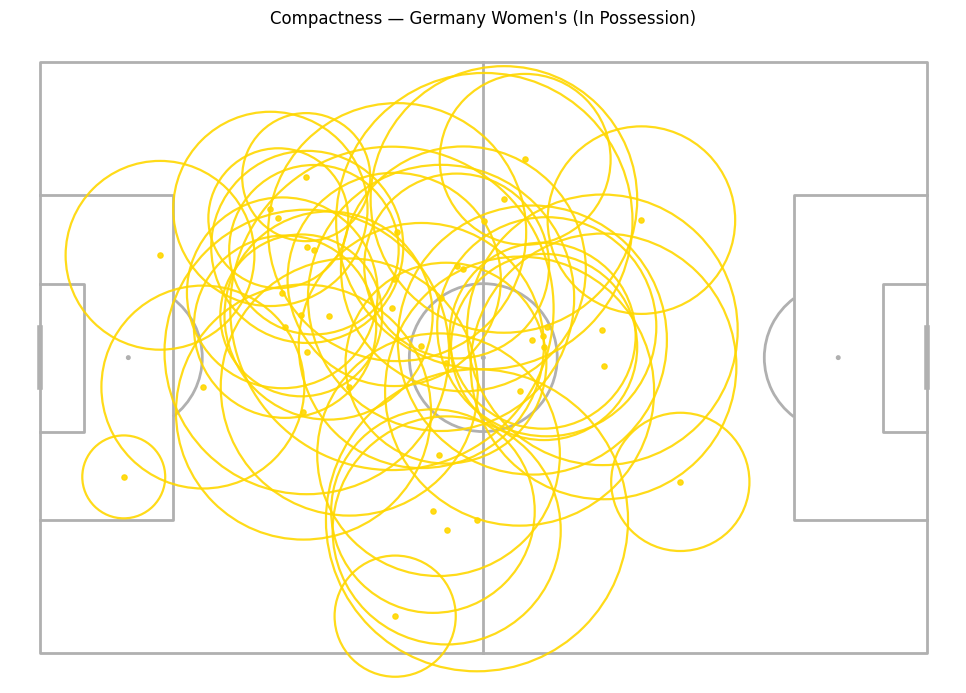

In [34]:
## Attacking compactness 

subset = (team_comp_all[team_comp_all['phase'] == 'in_possession']
          .sort_values('event_count', ascending=False)
          .head(40)  # trim to reduce clutter; adjust/ remove if you want all
          .copy())
subset['r_vis'] = subset['compactness_radius'] * scale

pitch = Pitch(pitch_type='statsbomb', line_zorder=2)
fig, ax = pitch.draw(figsize=(10, 7))

ax.scatter(subset['x_mean'], subset['y_mean'], s=14, alpha=0.9, c='gold', zorder=3)


for _, r in subset.iterrows():
    ax.add_patch(plt.Circle((r['x_mean'], r['y_mean']),
                            r['r_vis'], fill=False, edgecolor='gold',
                            lw=1.6, alpha=0.9, zorder=2))
ax.set_title(f"Compactness — {team_name} (In Possession)")
plt.show()

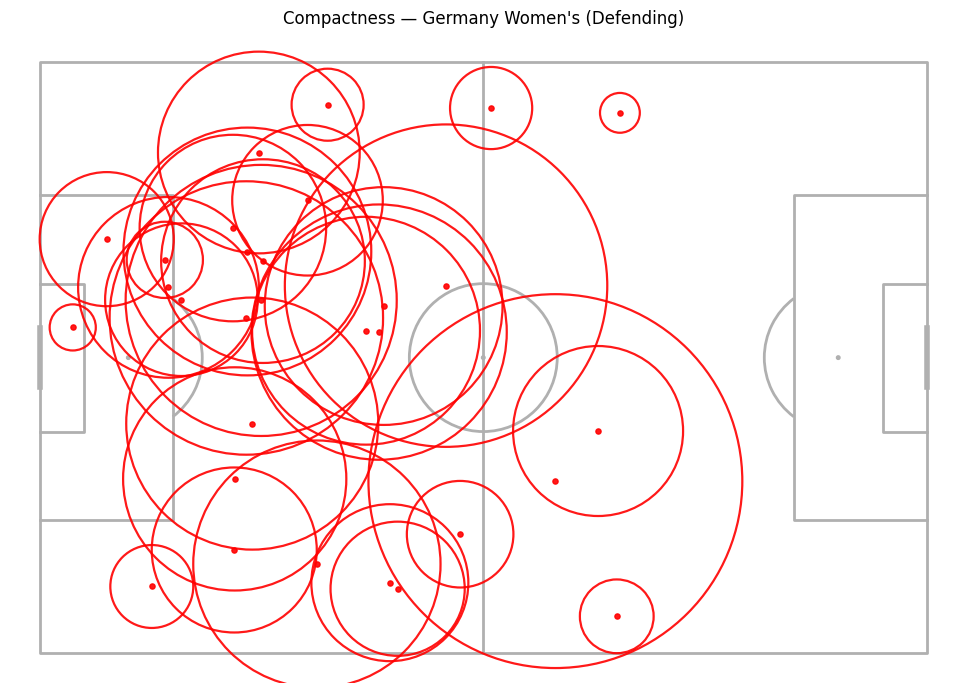

In [44]:
subset = (team_comp_all[team_comp_all['phase'] == 'defending']
          .sort_values('event_count', ascending=False)
          .head(40)
          .copy())
subset['r_vis'] = subset['compactness_radius'] * scale

pitch = Pitch(pitch_type='statsbomb', line_zorder=2)
fig, ax = pitch.draw(figsize=(10, 7))

ax.scatter(subset['x_mean'], subset['y_mean'], s=14, alpha=0.9, c='red', zorder=3)

for _, r in subset.iterrows():
    ax.add_patch(plt.Circle((r['x_mean'], r['y_mean']),
                            r['r_vis'], fill=False, edgecolor='red',
                            lw=1.6, alpha=0.9, zorder=2))
ax.set_title(f"Compactness — {team_name} (Defending)")
plt.show()